<a href="https://colab.research.google.com/github/buriihenry/Machine-Learning-2/blob/master/Fraud_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing dependancies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%time data = pd.read_csv('https://www.kaggle.com/sanjana08/paysim-data-analysis/data?select=PS_20174392719_1491204439457_log.csv',sep='delimiter', header=None)
print(data.shape)

CPU times: user 17.4 ms, sys: 5.25 ms, total: 22.7 ms
Wall time: 482 ms
(168, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
pip install kaggle

In [5]:
#Creating an API toke to read from kaggle
#mkdir ~/.kaggle
#cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d kaggle kernels pull sanjana08/paysim-data-analysis

In [6]:
data = pd.read_csv('drive/My Drive/Projects/Fraud.csv')
data.sample(15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3516070,259,PAYMENT,8496.23,C1355619768,0.00,0.00,M272374048,0.00,0.00,0,0
5689617,397,CASH_OUT,132689.28,C438060818,50106.91,0.00,C749932020,2109958.73,2242648.01,0,0
3766353,279,PAYMENT,6918.10,C841908338,0.00,0.00,M1373668180,0.00,0.00,0,0
634159,35,CASH_IN,186971.69,C1354710171,11195058.66,11382030.34,C414409410,5595963.71,5408992.02,0,0
5283651,372,PAYMENT,3163.67,C151647516,0.00,0.00,M1202081629,0.00,0.00,0,0
2756248,212,CASH_OUT,226373.37,C2041721332,0.00,0.00,C1819358994,259133.29,485506.66,0,0
1900193,165,CASH_IN,133175.67,C657424243,6249225.19,6382400.86,C390113200,7542814.76,7409639.10,0,0
6148264,546,PAYMENT,26591.71,C529599828,31610.00,5018.29,M1914354056,0.00,0.00,0,0
2137482,184,CASH_OUT,356943.96,C1750174821,11645.00,0.00,C1049779452,32737.62,389681.58,0,0
5527278,381,PAYMENT,7039.03,C17213711,372.00,0.00,M1937981673,0.00,0.00,0,0


In [7]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#describing the data

data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
#checking how many frauds are there

data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

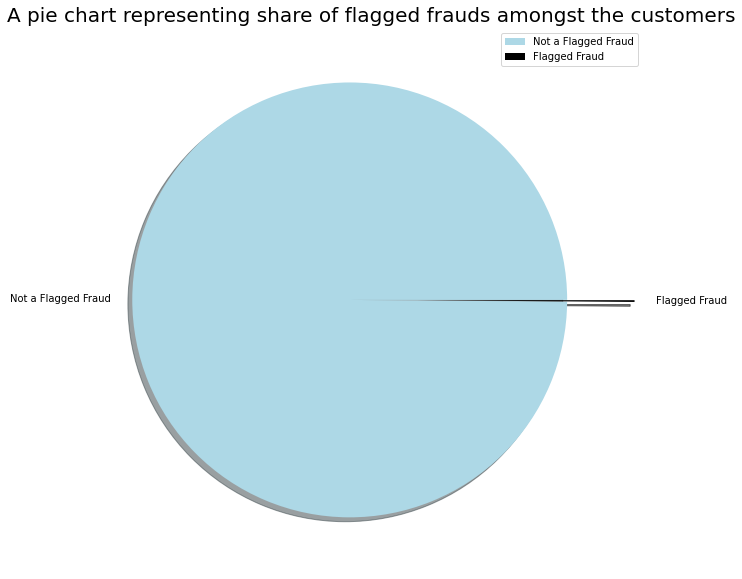

In [10]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [11]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

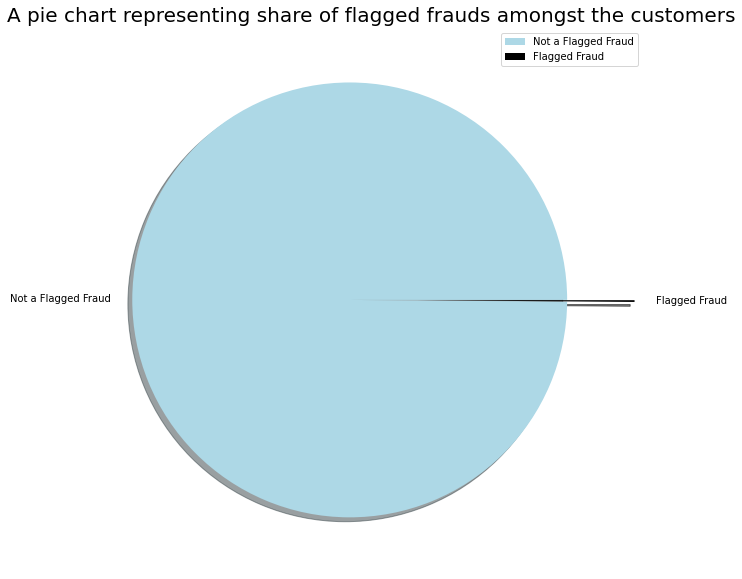

In [12]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [13]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

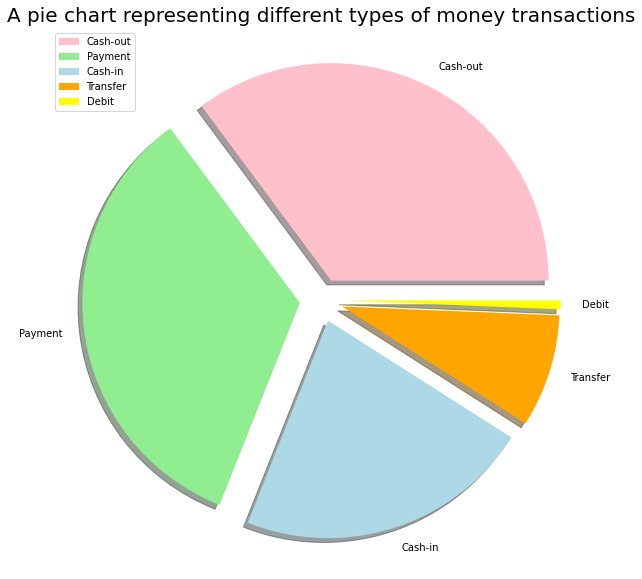

In [14]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [15]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 428


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


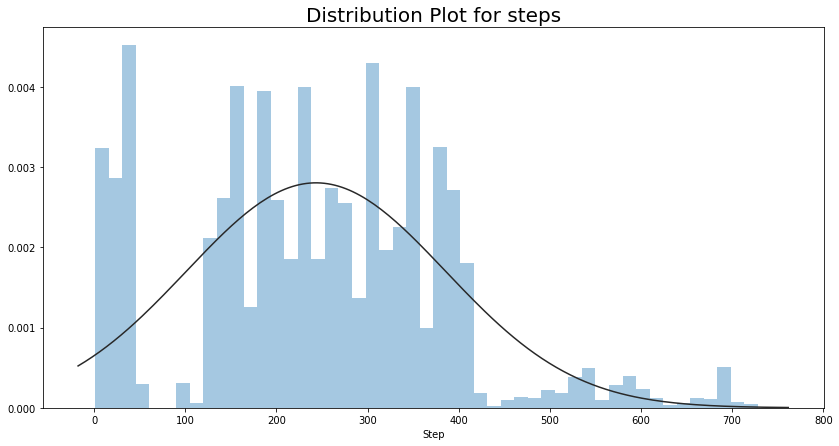

In [16]:
#setting the size of the figure
plt.rcParams['figure.figsize']=(14,7)

#importing norm
from scipy.stats import norm
sns.distplot(data.step, fit=norm, kde=False)
plt.title('Distribution Plot for steps', fontsize=20)
plt.xlabel('Step', fontsize=10)
plt.show()

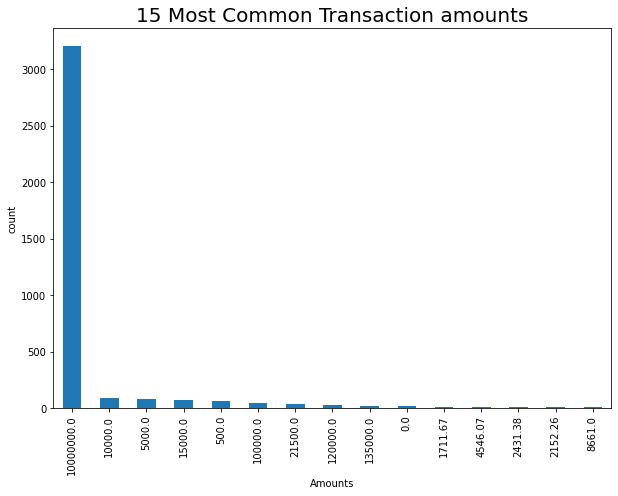

In [17]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

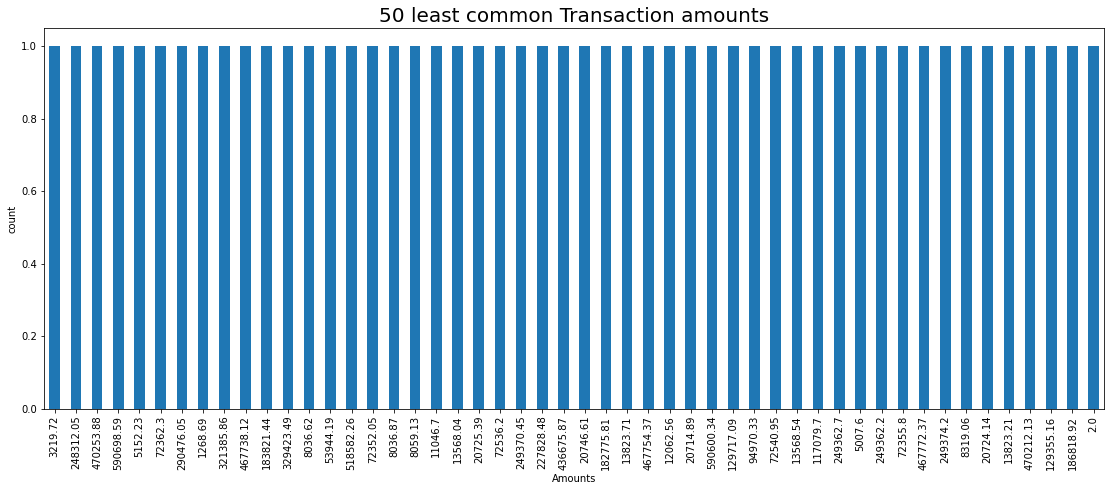

In [18]:
# checking the different values of amounts Transactioned
plt.rcParams['figure.figsize']=(19,7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 least common Transaction amounts', fontsize=20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


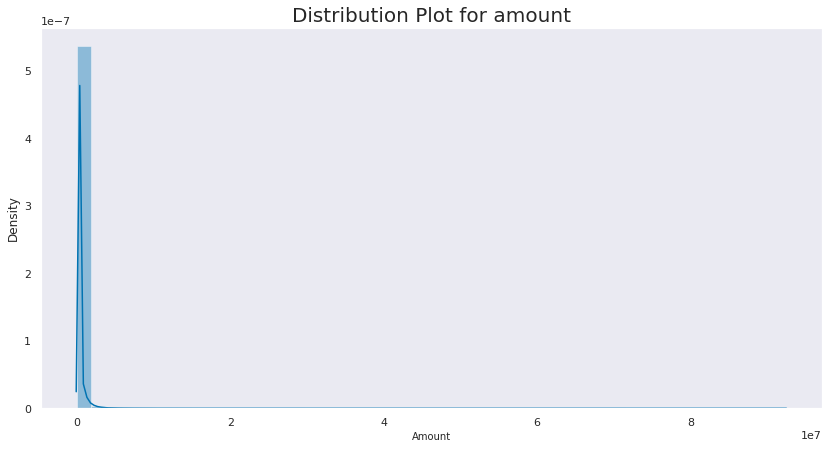

In [19]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [20]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [21]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [22]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [23]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [25]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [26]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type      amount  ... newbalanceDest  isFraud  isFlaggedFraud
0           1   PAYMENT     9839.64  ...            0.0        0               0
1           1   PAYMENT     1864.28  ...            0.0        0               0
2           1  TRANSFER      181.00  ...            0.0        1               0
4           1   PAYMENT    11668.14  ...            0.0        0               0
5           1   PAYMENT     7817.71  ...            0.0        0               0
...       ...       ...         ...  ...            ...      ...             ...
6362610   742  TRANSFER    63416.99  ...            0.0        1               0
6362612   743  TRANSFER  1258818.82  ...            0.0        1               0
6362614   743  TRANSFER   339682.13  ...            0.0        1               0
6362616   743  TRANSFER  6311409.28  ...            0.0        1               0

In [27]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


Minimum Original old Balance for Flagged Frauds